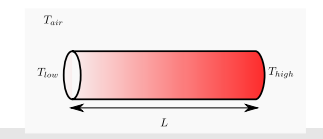

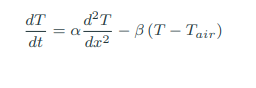

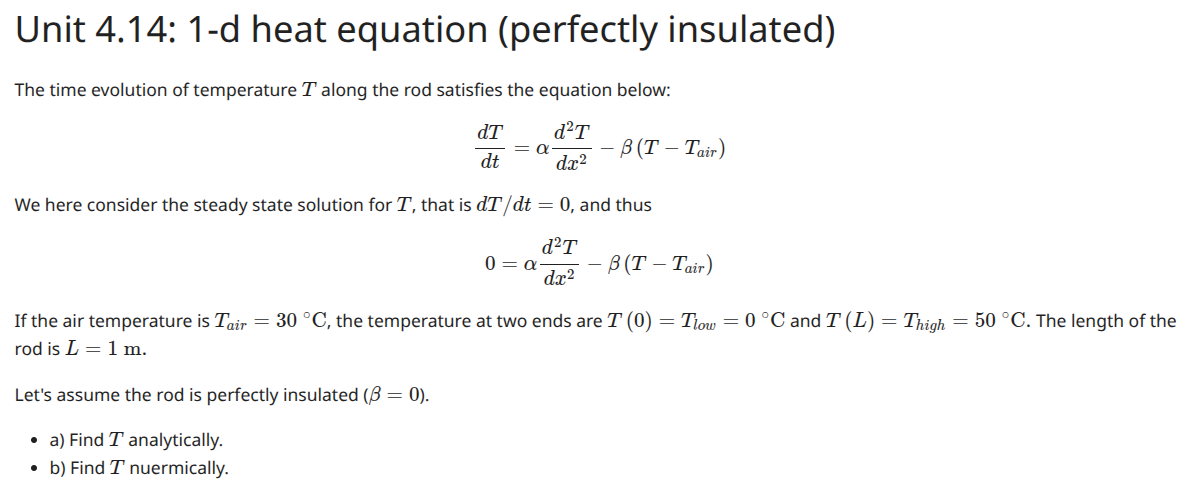

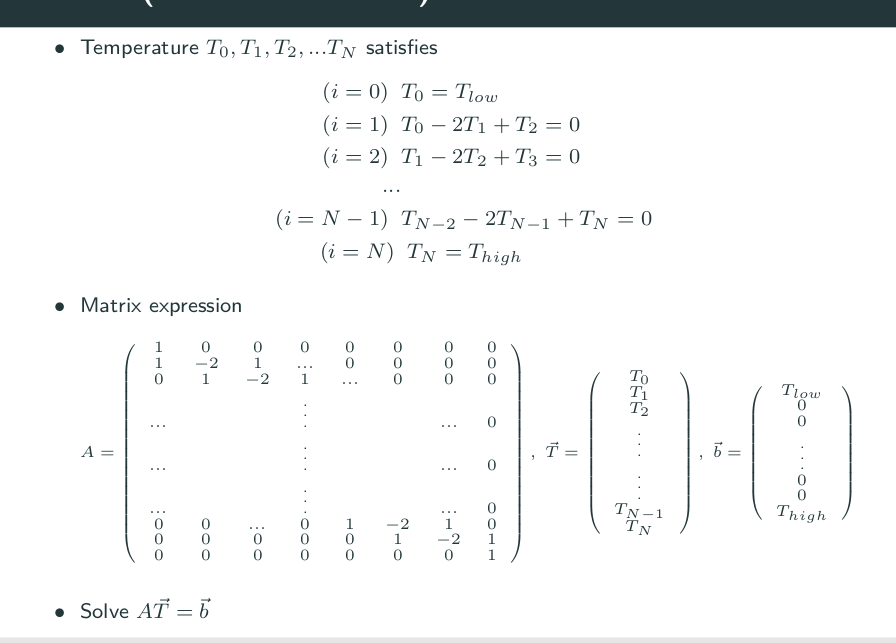



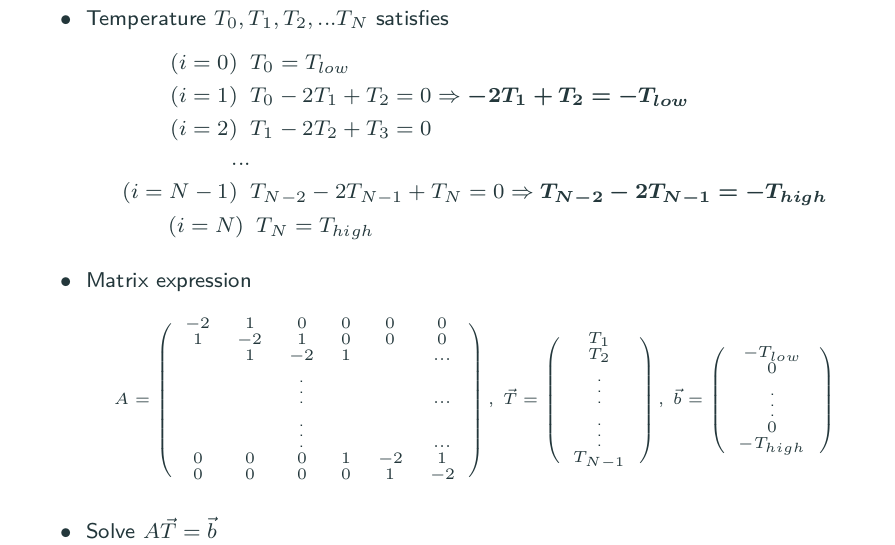

In [9]:
import numpy as np

N = 10
A = np.zeros([N+1,N+1]) 
#print (A)
#A[0,0]= 1 # Boundary Conditions, work on this latter



for i in range(1,N):
    for j in range(1,N):
        if i == j :
            A[i][j] = -2.
        elif i == j +1:
            A[i][j] = 1.
        elif i == j -1:
            A[i][j] = 1.        
#Boundary conditions
A[0][0] = 1.
A[1][0] = 1.
A[N][N] = 1.
A[N-1][N] = 1.
print (A)

b = np.zeros(N+1)  

b[0] = 0. #T_low
b[N] = 50. #T_high
print (b) 

T_arr = np.linalg.solve(A,b)

print (T_arr)

[[ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -2.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -2.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1. -2.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1. -2.  1.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1. -2.  1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1. -2.  1.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1. -2.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1. -2.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]]
[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. 50.]
[ 0.  5. 10. 15. 20. 25. 30. 35. 40. 45. 50.]


Text(0, 0.5, '$T\\; ({\\rm ^\\circ C})$')

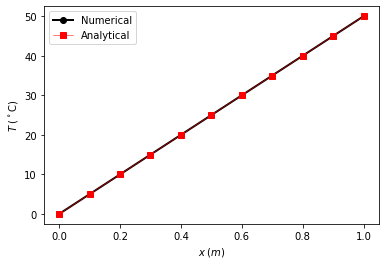

In [15]:
import matplotlib.pyplot as plt
#N = 4
x_arr = np.linspace(0,1.0,N+1)
plt.plot(x_arr, T_arr,'k-o',lw = 2,  label = 'Numerical')
T_analytic = 50. * x_arr
plt.plot(x_arr, T_analytic,'r-s',lw = 0.5, label = 'Analytical')
plt.legend()
plt.xlabel(r'$x\;(m)$')
plt.ylabel(r'$T\; ({\rm ^\circ C})$')


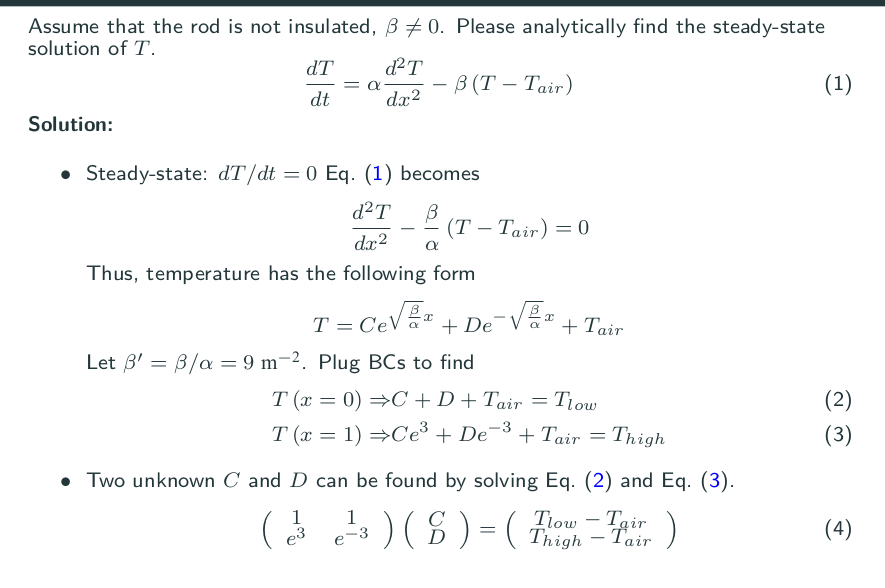

In [18]:


A = np.array([[1,1],
    [np.exp(3.0),np.exp(-3.0)]]) 
print (A)

T_low, T_air, T_high = 0., 30., 50,
b = np.array([T_low - T_air, T_high - T_air])
print (b)

C,D = np.linalg.solve(A,b)
print (C,D)


[[ 1.          1.        ]
 [20.08553692  0.04978707]]
[-30.  20.]
1.072763046393565 -31.072763046393565


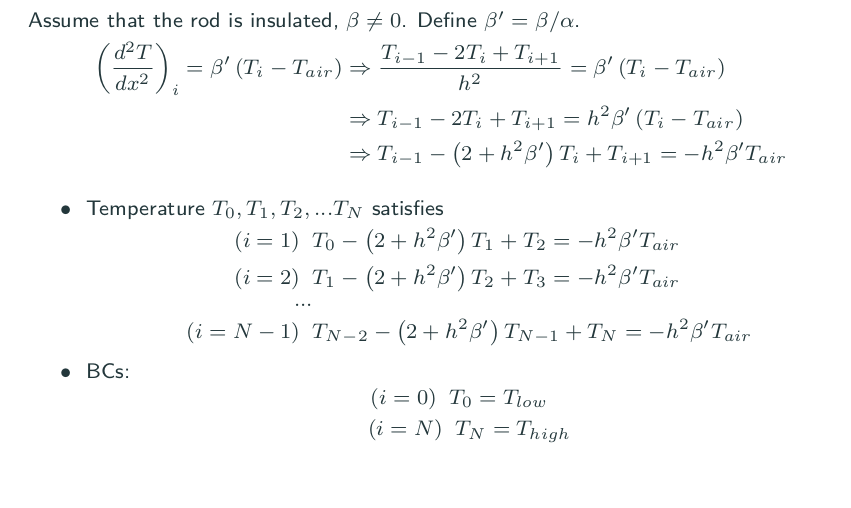


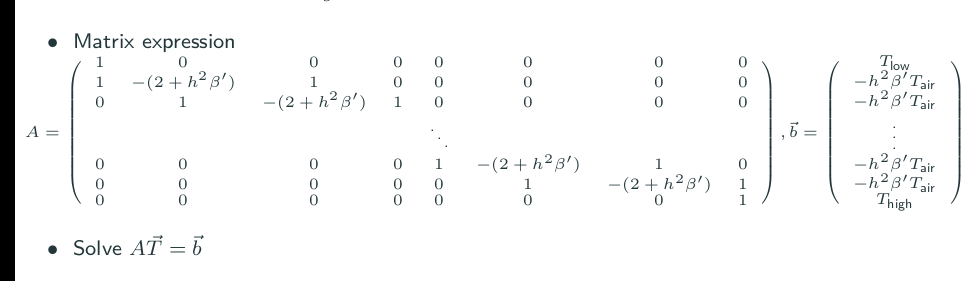

In [36]:
import numpy as np

N = 4
x_arr = np.linspace(0,1.0,N+1)
beta_prime = 9. # 1/m^2
h = 1./N

A = np.zeros([N+1,N+1]) 
#print (A)
#A[0,0]= 1 # Boundary Conditions, work on this latter
for i in range(1,N):
    for j in range(1,N):
        if i == j :
            A[i][j] = - (2. + h**2. * beta_prime)
        elif i == j +1:
            A[i][j] = 1.
        elif i == j -1:
            A[i][j] = 1.        
#Boundary conditions
A[0][0] = 1.
A[1][0] = 1.
A[N][N] = 1.
A[N-1][N] = 1.
print (A)

#==
b = np.zeros(N+1) 
for i in range(1,N):
    b[i] = - h**2. * beta_prime  * T_air  
 

b[0] = 0. #T_low
b[N] = 50. #T_high
print (b) 



[[ 1.      0.      0.      0.      0.    ]
 [ 1.     -2.5625  1.      0.      0.    ]
 [ 0.      1.     -2.5625  1.      0.    ]
 [ 0.      0.      1.     -2.5625  1.    ]
 [ 0.      0.      0.      0.      1.    ]]
[  0.    -16.875 -16.875 -16.875  50.   ]


In [37]:

T_numerical = np.linalg.solve(A,b)
print (T_numerical)



[ 0.         17.4380855  27.8100941  36.95028062 50.        ]


In [1]:
T_analyitic = C * np.exp(3.0 * x_arr) + D * np.exp(-3.0 * x_arr) + T_air
plt.plot(x_arr, T_analyitic,'k-')
plt.plot(x_arr, T_numerical,'r--')

plt.legend()
plt.xlabel(r'$x\;(m)$')
plt.ylabel(r'$T\; ({\rm ^\circ C})$')




NameError: name 'C' is not defined

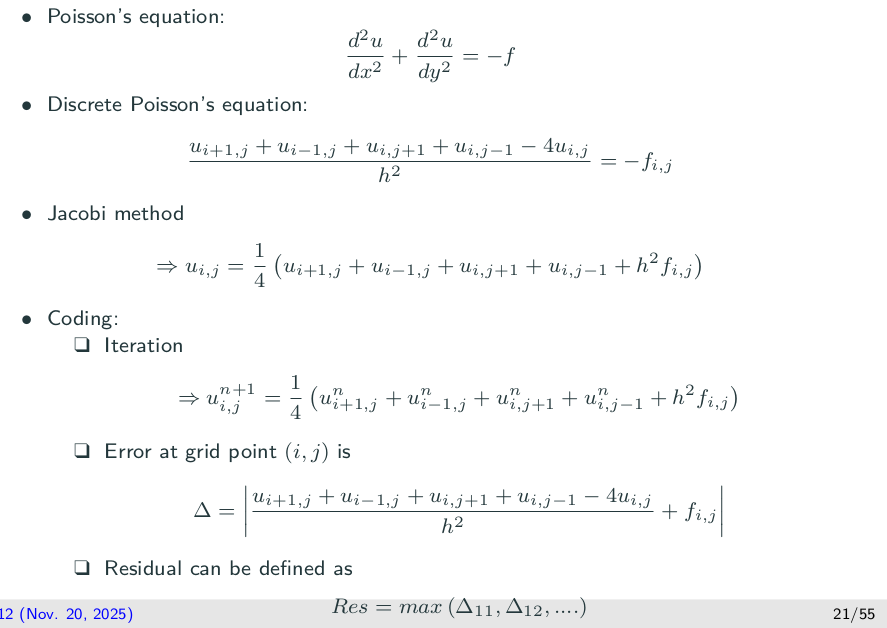

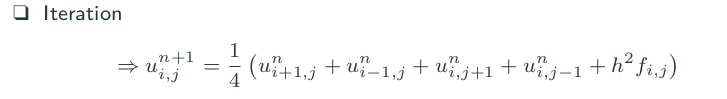

In [ ]:

u_old

u_new
Nx = 4 #10
Ny = 4 #10

Lx = 2.
Ly = 2.
h = Lx/Nx






for i in range(1, Nx):
    for j in range(1,Ny):
        #u_new_ij = 1./4. * (u_old_left + u_old_right 
        #+ u_old_top + u_old_bottom + h**2. * f_ij)
        u_old_left = u_old[i-1,j]
        u_old_right = u_old[i+1,j]
        u_old_top = u_old[i,j+1]
        u_old_bottom = u_old[i,j-1]
        u_new[i,j] = 1./4. *  (u_old_left + u_old_right 
                              + u_old_top + u_old_bottom + h**2. * f_ij)
        
        
        
        

